From the boostrapping scan files, find the direction with highest n_sigma and find the closest direction in best fit, after which we find the amplitude of H0 variation in the best fit.

# Visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')

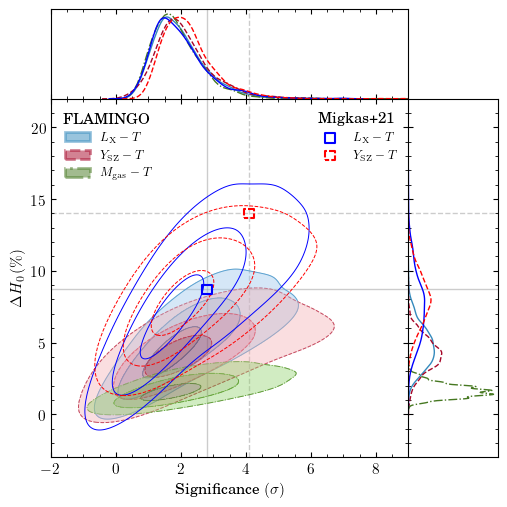

In [23]:
# ---------------------------------------------------------------------------- #
#                                Plot for print                                #
# ---------------------------------------------------------------------------- #

files = (
    '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare.csv',
    '/cosma8/data/do012/dc-he4/analysis_all/h0_direct_compare_scatter.csv'
)

colors = ['#348ABD', '#A60628', '#467821']
linestyles = ['solid', '--', '-.']  # solid, densely dashed, densely dashdotdotted https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

# Create the 2D KDE plot
g = sns.JointGrid(
                space=0,
                ratio=4,
                height=5,
                xlim=(-2, 9),
                ylim=(-3, 22),
                )

for file_path in files:

    data = pd.read_csv(file_path)
    data['Delta_H0'] *= 100

    # kde plot missing 3rd level contour if use g.plot_joint, for unknown reason
    for relation, color, linestyle in zip(['$L_\\mathrm{{X}}-T$', '$Y_\\mathrm{{SZ}}-T$', '$M_\\mathrm{{gas}}-T$'], 
                                colors, linestyles):

        # Line contours
        if 'scatter' in file_path and 'L' in relation:
            color = 'b'
            zorder = 7
        elif 'scatter' in file_path and 'Y' in relation:
            color = 'r'
            zorder = 7
        else:
            zorder = 1

        sns.kdeplot(data=data[data['Relations'] == relation], 
                    x='Significance',
                    y='Delta_H0', 
                    #hue='Relations',
                    color=color,
                    fill=False, 
                    levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                    bw_adjust=2.5,
                    zorder=zorder,
                    linestyles=linestyle,
                    linewidths=0.7,
                    ax=g.ax_joint,
                    )

        # Filled contours (only for no scatter)
        if 'scatter' not in file_path:
            sns.kdeplot(data=data[data['Relations'] == relation], 
                        x='Significance',
                        y='Delta_H0', 
                        #hue='Relations',
                        color=color,
                        fill=True, 
                        levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
                        bw_adjust=2.5,
                        zorder=2,
                        alpha=0.4,
                        ax=g.ax_joint,
                        )

        # Marginal histograms
        sns.kdeplot(data=data[data['Relations'] == relation], 
                    x='Significance',
                    fill=False,
                    color=color,
                    linestyle=linestyle,
                    ax=g.ax_marg_x
        )
   
        sns.kdeplot(data=data[data['Relations'] == relation], 
                    y='Delta_H0',
                    fill=False,
                    color=color,
                    linestyle=linestyle,
                    ax=g.ax_marg_y,
        )

# M21 results
x_point = 2.8 # 2.4
y_point = 8.7
g.refline(x=x_point, y=y_point, linestyle=linestyles[0], color='grey', linewidth=1, alpha=0.4, zorder=0)
line0 = g.ax_joint.scatter(x_point, y_point, marker='s', s=50, 
    linewidths=1.5, facecolor='none', edgecolors='b', linestyle=linestyles[0],
    label='$L_\\mathrm{{X}}-T$', zorder=10)

#g.ax_joint.axhspan(ymin=8.7-3.1, ymax=8.7+3.1, color='tab:blue', alpha=0.2, zorder=0)

x_point = 4.1 # 2.6
y_point = 14
g.refline(x=x_point, y=y_point, linestyle=linestyles[1], color='grey', linewidth=1, alpha=0.4, zorder=0)
line1 = g.ax_joint.scatter(x_point, y_point, marker='s', s=50, 
    linewidths=1.5, facecolor='none', edgecolors='r', linestyle=(2, (4, 1)),
    label='$Y_\\mathrm{{SZ}}-T$', zorder=10)

# # matplotlib doesn't detect the contour correctly, adding it manually
# import matplotlib.patches as mpatches
# contour = mpatches.Patch(color='tab:blue', label='$Y_\\mathrm{{SZ}}-T$')
g.ax_marg_x.legend(handles=[line0, line1], title='Migkas+21', loc='upper right', bbox_to_anchor=(1,0), fontsize=9) # put right corner at 1,0

#sns.move_legend(g.ax_joint, loc='upper right', bbox_to_anchor=(1.7, 0.75), title='FLAMINGO')
from matplotlib.patches import Patch
# Create custom legend for contours
contour_legend_elements = [Patch(facecolor=colors[0], edgecolor=colors[0], linestyle=linestyles[0], linewidth=2, label='$L_\\mathrm{X}-T$', alpha=0.5),
                        Patch(facecolor=colors[1], edgecolor=colors[1], linestyle=linestyles[1], linewidth=2, label='$Y_\\mathrm{SZ}-T$', alpha=0.5),
                        Patch(facecolor=colors[2], edgecolor=colors[2], linestyle=linestyles[2], linewidth=2, label='$M_\\mathrm{gas}-T$', alpha=0.5)]

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# Add the custom legend for contours
g.ax_joint.legend(handles=contour_legend_elements, title='FLAMINGO', loc='upper left', fontsize=9)

g.set_axis_labels('Significance $(\\sigma)$', '$\\Delta H_0\\,(\\%)$')
# plt.savefig('./to_paper/h0_scan_hist_LTYTMT.pdf', bbox_inches='tight')
# Show the plot
plt.show()
